# Tree Properties

## Lesson Overview

Like a graph, a tree is a data structure formed by multiple connected nodes. However, these nodes are connected hierarchically, with some nodes typically being "above" other nodes.

> A **node** is the base unit of several data structures such as linked lists, graphs, and trees. There is no restriction on a node's value or type, but generally, nodes contain data in one of the four fundamental data types: integer, string, float, or boolean.

> A **tree** is a specialized graph that hierarchically represents connections from a starting **root** node to the lowest-level **leaf** nodes. Often, trees are represented vertically, with the root being the highest point in the tree and the leaf nodes being the lowest point in the tree.

> The **root** node is the start node of a tree; all subsequent nodes branch off of the root node or branches of the root node.

> A **leaf node** is a node with no additional lower-level connections.

> A **parent node** is any node that is immediately above a lower-level node. The set of nodes including the node itself, its parents, their parents, and so on, is known as that node's **ancestors**.

> A **child node** is any node immediately below a higher-level node. The set of nodes including the node itself, its children, their children, and so on is known as that node's **descendants**.

### Examining a tree

You can think of a tree as very similar to a linked list, except that in a tree, a particular node can have two (or more) `next` elements, commonly referred to as that node's children. Multiple nodes may have the same `previous` element, as well, but that node would be considered the parent of those nodes.

For instance, consider the following tree:

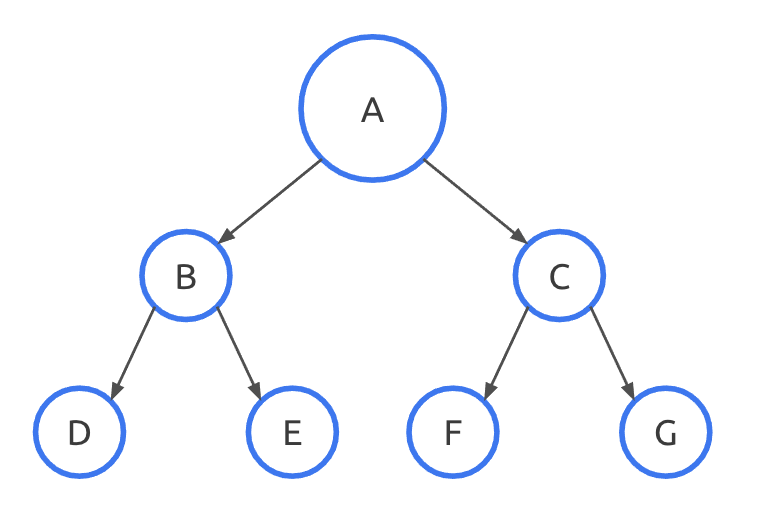

We can define some of the nodes in the tree by their relationships to each other.

* $A$ is the root node. It is the parent node of $B$ and $C$, and an ancestor of $D$, $E$, $F$, and $G$.
* $B$ is $A$'s child, and $B$ is the parent of $D$ and $E$.
* $D$ is the child of $B$ and a descendant of $A$. Since $D$ has no children of its own, $D$ is considered to be a leaf node.

Trees are specialized versions of graphs, so their use cases will often leverage their structure:

* Representing hierarchical relationships between nodes (e.g. families, manager-report relationships)
* Representing branching possibilities (decision trees, branching narratives in a game, the flow of a river from a single source)

### Representing a tree in code

Representing a tree requires both a `Node` class and the `Tree` class. Note that a tree's `Node` class is different from a graph's `Node` class, in that it contains `parent` and `children` attributes.

In [ ]:
#persistent
class Node:

  def __init__(self, name):
    self.name = name
    self.parent = None
    self.children = []

  def add_child(self, node):
    # If the node is not already present in our children, we add it.
    if node not in self.children:
      self.children.append(node)
      # We also set the node's parent to be this node.
      node.parent = self

  def get_parent(self):
    return self.parent

  def get_children(self):
    return self.children

  def __str__(self):
    return '%s: %s' % (self.name, [node.name for node in self.children])

  def __repr__(self):
    return '%s: %s' % (self.name, [node.name for node in self.children])

In [ ]:
#persistent
class Tree:

  def __init__(self, root_node):
    self.root = root_node

### Tree example

Let's take a look at an example of a tree.

In [ ]:
tree = Tree(Node('A')) # root node is A
node_list = [Node('B'), Node('C'), Node('D')]

root = tree.root
root.add_child(node_list[0]) # A's child is B
root.add_child(node_list[1]) # A's child is C
node_list[0].add_child(node_list[2]) # B's child is D

#   A
#  / \
# B   C
# |
# D

If you were to draw that tree, you would get something that looks like this:

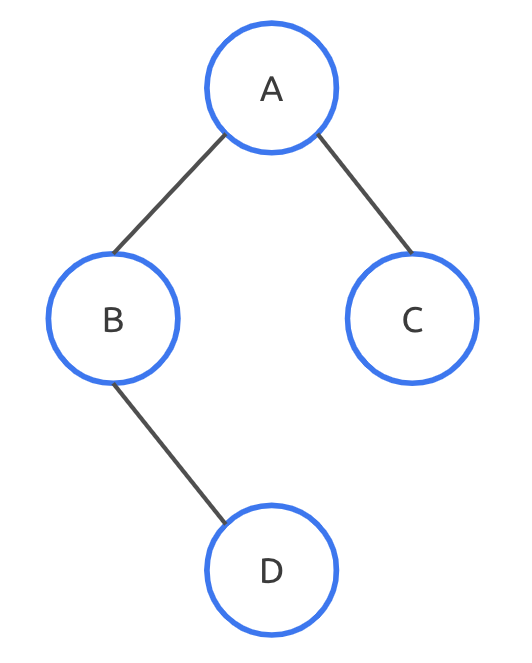

In this tree, the $C$ and $D$ nodes are both leaves, as they have no children.

## Question 1

Which of the following statements about a tree node are true?

**a)** A tree node should only store a link to its parent.

**b)** A tree node may be the root and a leaf simultaneously.

**c)** A tree node may only have up to two children.

**d)** If a tree node has no children, it is considered to be a leaf node.

### Solution

The correct answers are **b)** and **d)**.

**a)** Some implementations of tree nodes store links to their parents, but all implementations must link to the children of a node.

**c)** There is no fundamental limit on the number of children a tree node can have.

## Question 2

Click the correct response(s).

Which of the following statements about a tree are true?

**a)** If a leaf node connects back to the root, the tree is known as a cyclic tree.

**b)** A tree may only have one root node.

**c)** A tree must have at least one leaf node.

**d)** Edges may be defined implicitly (a node storing a list of its connections) or explicitly (through their own class or object).

### Solution

The correct answers are **b)**, **c)**, and **d)**.

**a)** Cyclic trees don't exist. That would just be a cyclic graph, as it violates the tree structure.

## Question 3

Given the following tree, which of the following statements are true?

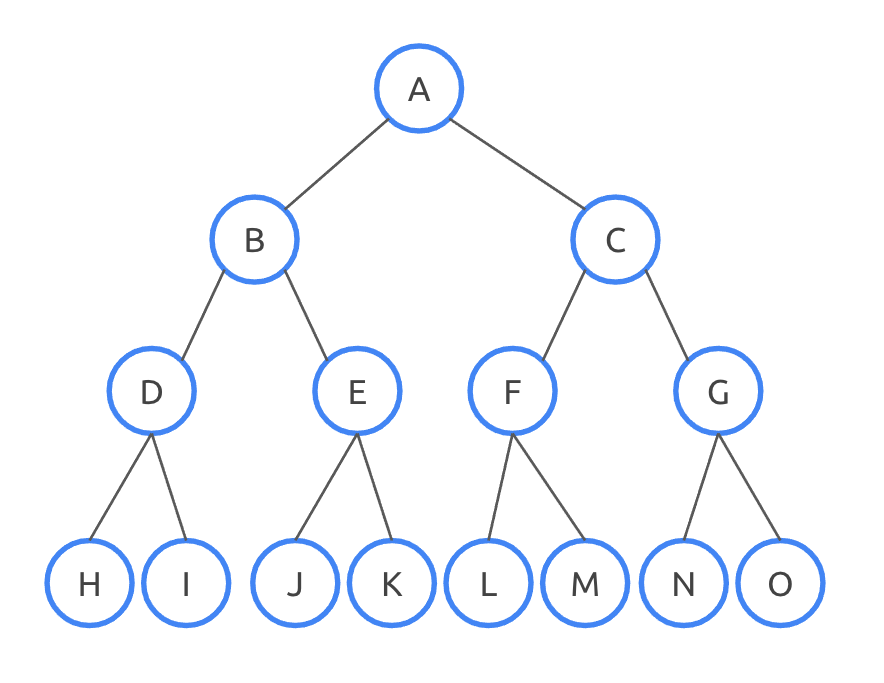

**a)** $H$, $L$, and $O$ are all leaf nodes.

**b)** $E$ is a parent, a child, an ancestor, and a descendant.

**c)** $G$ is $C$'s ancestor.

**d)** $K$ is a root node, since it is at the bottom of the tree.

### Solution

The correct answers are **a)** and **b)**.

**c)** The relationship is reversed. $G$ is a descendant of $C$, and $C$ is $G$'s ancestor.

**d)** That is a leaf node, not the root. Trees only have one root node, and our tree's root is $A$.

## Question 4

Given the following tree, which of the following statements about node $8$ are true?

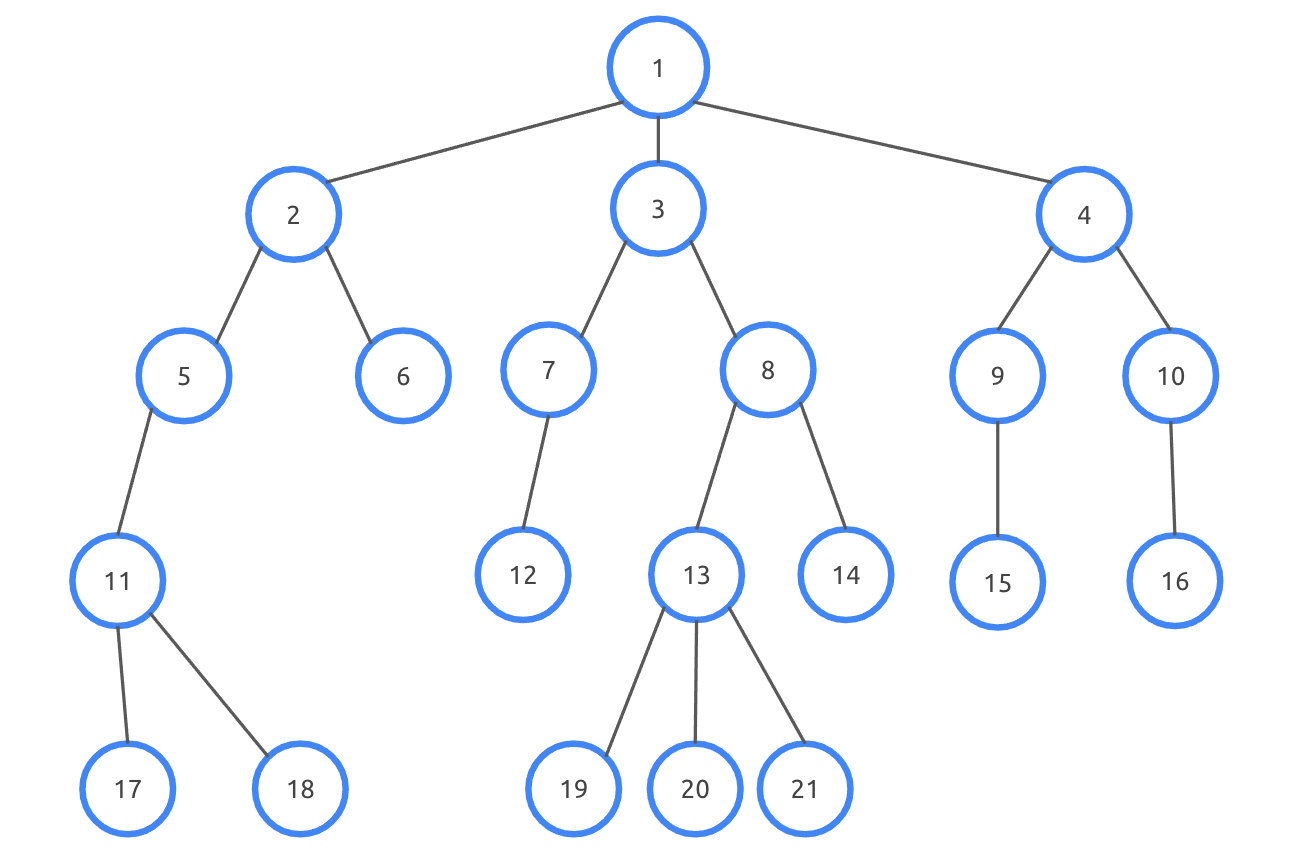

**a)** Node $1$, the root node, is $8$'s parent.

**b)** Node $13$ is $8$'s child.

**c)** Nodes $16$ and $17$ are descendants of $8$.

**d)** Node $3$ is $8$'s ancestor.

### Solution

The correct answers are **b)** and **d)**.

**a)** The root is an ancestor of $8$, but not its direct parent.

**c)** Those nodes are descendants of $1$, the root, but they're not direct descendants of $8$.

## Question 5

Which of the following real-world use cases are well represented as trees?

**a)** A video game with branching outcomes based on decisions that your character makes.

**b)** A grocery store checkout line.

**c)** A representation of the descendants of your early ancestor.

**d)** A map of the United States's various airports and flight paths.

### Solution

The correct answers are **a)** and **c)**.

**b)** That's likely best implemented via a queue.

**d)** That is probably best represented as a graph.

## Question 6

Write a `get_ancestors` method that returns a list of that node's ancestors, up to the root node.

Nodes in a tree can be defined in relation to other nodes, as we've talked about already:

* All nodes (except the root) have a parent
* Some nodes have children
* All nodes have ancestors and descendants (a node is included in its ancestors and in its descendants)

Other relationships exist, but we'll focus on these. For this and subsequent problems, treat a node as its own ancestor.

In [ ]:
class Tree:

  def __init__(self, root_node):
    self.root = root_node

In [ ]:
class Node:

  def __init__(self, name):
    self.name = name
    self.parent = None
    self.children = []

  def add_child(self, node):
    # If the node is not already present in our children, we add it.
    if node not in self.children:
      self.children.append(node)
      # We also set the node's parent to be this node.
      node.parent = self

  def get_parent(self):
    return self.parent

  def get_children(self):
    return self.children

  def get_ancestors(self):
    # TODO(you): implement
    print('This method has not been implemented.')

  def __str__(self):
    return '%s: %s' % (self.name, [node.name for node in self.children])

  def __repr__(self):
    return '%s: %s' % (self.name, [node.name for node in self.children])

### Hint

You could use a `while` loop to solve this problem; start with your current node and stop at the root, which you can identify as the node with no `self.parent` element.

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
tree = Tree(Node('A'))
node_list = [Node('B'), Node('C'), Node('D')]

root = tree.root
root.add_child(node_list[0])
root.add_child(node_list[1])
node_list[0].add_child(node_list[2])

ancestors = node_list[2].get_ancestors()
print([a.name for a in ancestors])
# Should print: ['D', 'B', 'A']

### Solution

Start by adding your current node to a list, and then using a `while` loop to iterate up to the root node, adding each parent to the list before returning it.

In [ ]:
class Node:

  def __init__(self, name):
    self.name = name
    self.parent = None
    self.children = []

  def add_child(self, node):
    if node not in self.children:
      self.children.append(node)
      node.parent = self

  def get_parent(self):
    return self.parent

  def get_children(self):
    return self.children

  def get_ancestors(self):
    ancestors = []
    current_node = self
    # If current_node is none (because we attempted to move up from the root),
    # we can just return.
    while current_node:
      ancestors.append(current_node)
      current_node = current_node.parent
    return ancestors

  def __str__(self):
    return '%s: %s' % (self.name, [node.name for node in self.children])

  def __repr__(self):
    return '%s: %s' % (self.name, [node.name for node in self.children])

## Question 7

Write a `get_descendants` method for the `Node` class that returns a list of all that node's descendants.

Now that you can get all of a node's ancestors, try to get all of the node's descendants. Recall that the descendants of a node is a set that includes the node, all of that node's children, and their children, and so on. 

In [ ]:
class Tree:

  def __init__(self, root_node):
    self.root = root_node

In [ ]:
class Node:

  def __init__(self, name):
    self.name = name
    self.parent = None
    self.children = []

  def add_child(self, node):
    if node not in self.children:
      self.children.append(node)
      node.parent = self

  def get_parent(self):
    return self.parent

  def get_children(self):
    return self.children

  def get_ancestors(self):
    ancestors = []
    current_node = self
    # If current_node is none (because we attempted to move up from the root),
    # we can just return.
    while current_node:
      ancestors.append(current_node)
      current_node = current_node.parent
    return ancestors

  def get_descendants(self):
    # TODO(you): implement
    print('This method has not been implemented.')

  def __str__(self):
    return '%s: %s' % (self.name, [node.name for node in self.children])

  def __repr__(self):
    return '%s: %s' % (self.name, [node.name for node in self.children])

### Hint

If it sounds like this may require recursion to solve, that's a good instinct. Keep track of a list of descendants as you recurse through your node's children and subsequent grandchildren and etc. If you're doing recursion, it will help you to create a helper method that you can call recursively so that you're not relying on the method you're writing to be your recursive call. Treat that as a wrapper for the recursion, instead. If you're stuck, here's how we set up the wrapper.

```python
def get_descendants(self):
  descendants = []
  self._get_descendants_helper(self, descendants)
  return descendants

def _get_descendants_helper(self, current_node, descendants):
  # TODO(you): Use recursion to fill the descendants array.
```

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
tree = Tree(Node('A'))
node_list = [Node('B'), Node('C'), Node('D')]

root = tree.root
root.add_child(node_list[0])
root.add_child(node_list[1])
node_list[0].add_child(node_list[2])

descendants = node_list[0].get_descendants()
print([d.name for d in descendants])
# Should print: ['B', 'D']

### Solution

The key here is relying on Python to pass a reference to the `descendants` array, which allows each recursive call to fill the array with the current node. This lets the recursion bottom out as we hit leaf nodes and will ultimately produce a complete list of a node's descendants.

In [ ]:
class Node:

  def __init__(self, name):
    self.name = name
    self.parent = None
    self.children = []

  def add_child(self, node):
    if node not in self.children:
      self.children.append(node)
      node.parent = self

  def get_parent(self):
    return self.parent

  def get_children(self):
    return self.children

  def get_ancestors(self):
    ancestors = []
    current_node = self
    # If current_node is none (because we attempted to move up from the root),
    # we can just return.
    while current_node:
      ancestors.append(current_node)
      current_node = current_node.parent
    return ancestors

  def get_descendants(self):
    descendants = []
    self._get_descendants_helper(self, descendants)
    return descendants

  def _get_descendants_helper(self, current_node, descendants):
    descendants.append(current_node)
    for child in current_node.children:
      self._get_descendants_helper(child, descendants)
    # Note that you don't need a base case, because the function will return
    # on its own if the node is a leaf (and has no children).

  def __str__(self):
    return '%s: %s' % (self.name, [node.name for node in self.children])

  def __repr__(self):
    return '%s: %s' % (self.name, [node.name for node in self.children])

## Question 8

Write a `remove_node` method for the `Tree` class that removes a node and its children from the tree.

In [ ]:
#persistent
class Node:

  def __init__(self, name):
    self.name = name
    self.parent = None
    self.children = []

  def add_child(self, node):
    if node not in self.children:
      self.children.append(node)
      node.parent = self

  def get_parent(self):
    return self.parent

  def get_children(self):
    return self.children

  def get_ancestors(self):
    ancestors = []
    current_node = self
    while current_node:
      ancestors.append(current_node)
      current_node = current_node.parent
    return ancestors

  def get_descendants(self):
    descendants = []
    self._get_descendants_helper(self, descendants)
    return descendants

  def _get_descendants_helper(self, current_node, descendants):
    descendants.append(current_node)
    for child in current_node.children:
      self._get_descendants_helper(child, descendants)

  def __str__(self):
    return '%s: %s' % (self.name, [node.name for node in self.children])

  def __repr__(self):
    return '%s: %s' % (self.name, [node.name for node in self.children])

In [ ]:
class Tree:

  def __init__(self, root_node):
    self.root = root_node

  def remove_node(self, node_to_remove):
    # TODO(you): implement
    print('This method has not been implemented.')

### Hint

Don't focus on deleting the node itself and all of its children from memory. Instead, remove the node from its parent's `self.children` list.

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
tree = Tree(Node('A'))
node_list = [Node('B'), Node('C'), Node('D'), Node('E'), Node('F')]

root = tree.root
root.add_child(node_list[0])
root.add_child(node_list[1])
root.add_child(node_list[3])
root.add_child(node_list[4])
node_list[0].add_child(node_list[2])

tree.remove_node(node_list[0])
print([c.name for c in root.children])
# Should print: ['C', 'E', 'F']

### Solution

For this one, you'll want to remove the node from its parent's children *and* remove the parent from the removed node. That way, you won't have any paths remaining back into the tree. Also, it allows the computer to clean up the memory associated with that node since it's not referenced anymore.

In [ ]:
class Tree:

  def __init__(self, root_node):
    self.root = root_node

  def remove_node(self, node_to_remove):
    parent = node_to_remove.parent
    parent.children.remove(node_to_remove)
    node_to_remove.parent = None

## Question 9

You may not always want to completely clear out the node's children when removing it from a tree, though. Modify the `remove_node` class to have a `preserve_children` argument passed in that, if `True`, removes the indicated node but sets its children to be children of the removed node's parent.

As an example, if we called `remove_node` on $C$, in this tree:

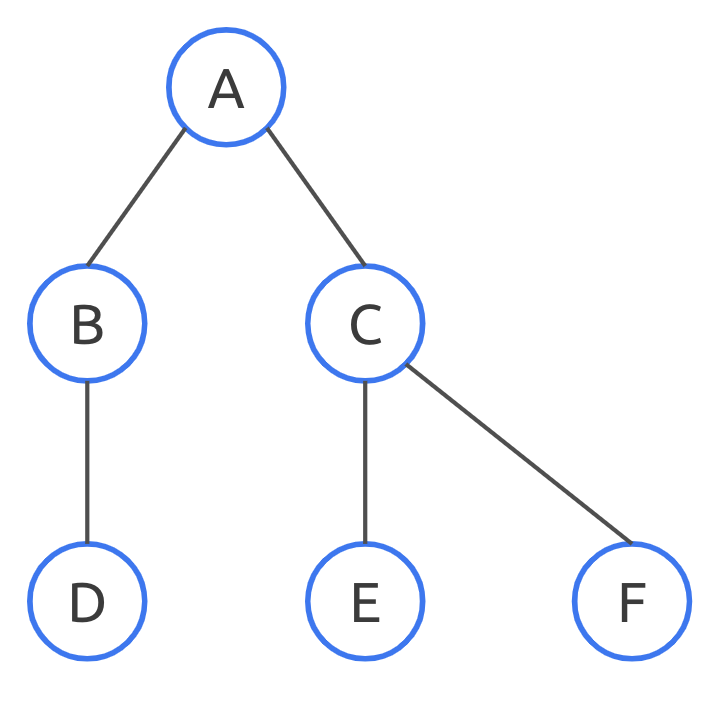

If `preserve_children` is set to `True`, our resulting tree would look like this:

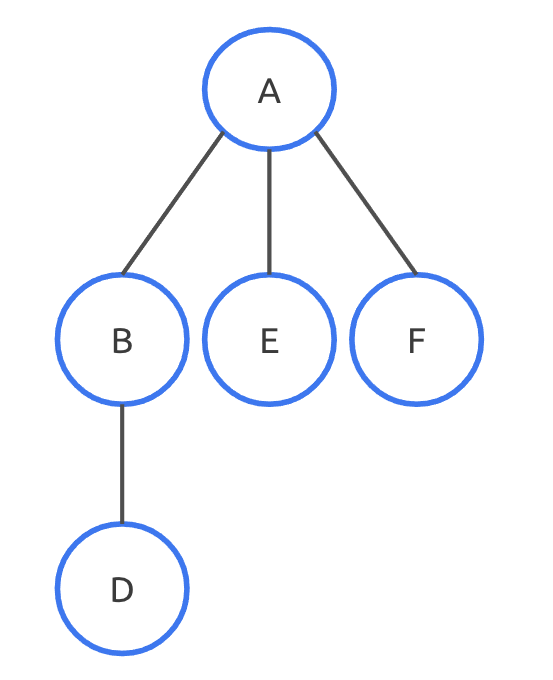

In [ ]:
class Tree:

  def __init__(self, root_node):
    self.root = root_node

  def remove_node(self, node_to_remove, preserve_children=False):
    # TODO(you): Modify this so that node_to_remove's children are added to its
    # parent's children.
    parent = node_to_remove.parent
    parent.children.remove(node_to_remove)
    node_to_remove.parent = None

### Hint

This will largely work the same as the previous question, but now instead of ignoring your node's children, add them to the parent's `self.children` list.

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
tree = Tree(Node('A'))
node_list = [Node('B'), Node('C'), Node('D'), Node('E'), Node('F')]

root = tree.root
root.add_child(node_list[0])
root.add_child(node_list[1])
root.add_child(node_list[3])
root.add_child(node_list[4])
node_list[0].add_child(node_list[2])

tree.remove_node(node_list[0])
print([c.name for c in root.children])
# Should print: ['C', 'E', 'F', 'D']

### Solution

In [ ]:
class Tree:

  def __init__(self, root_node):
    self.root = root_node

  def remove_node(self, node_to_remove, preserve_children=False):
    parent = node_to_remove.parent
    parent.children.remove(node_to_remove)
    node_to_remove.parent = None
    for child in node_to_remove.children:
      parent.children.append(child)
    # Don't forget to set node_to_remove's children to be empty!
    node_to_remove.children = []

## Question 10

Write a `get_height` method for the `Tree` class that returns the height of the tree.

Another specialized property of trees that isn't defined for a general graph is the concept of **height**. The height of a tree is the number of distinct levels of nodes that exist within the tree. Take this tree, for instance:

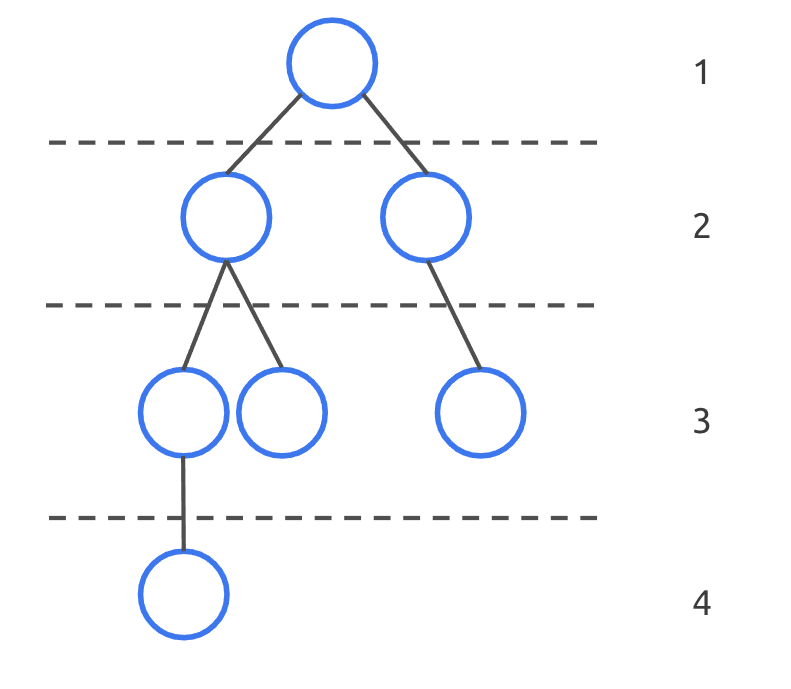

This tree has a height of 4, as there are four distinct levels of nodes. For a tree that contains only one node, its height is 1.

In [ ]:
class Tree:

  def __init__(self, root_node):
    self.root = root_node

  def remove_node(self, node_to_remove, preserve_children=False):
    parent = node_to_remove.parent
    parent.children.remove(node_to_remove)
    node_to_remove.parent = None
    for child in node_to_remove.children:
      parent.children.append(child)
    node_to_remove.children = []

  def get_height(self):
    # TODO(you): implement
    print('This method has not been implemented.')

### Hint

A tree consisting of only a single root node has a height of 1. From there, every tree can be represented as a root node with children, where each child is the "root" of the subtree represented by its children. Thinking about it like that, a tree's height is just 1 + the maximum height of its children's subtrees. Try to keep that in mind, and make sure you've specified the base case so that you can exit the recursion.

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
tree = Tree(Node('A'))
node_list = [Node('B'), Node('C'), Node('D')]

root = tree.root
root.add_child(node_list[0])
root.add_child(node_list[1])
node_list[0].add_child(node_list[2])

print(tree.get_height())
# Should print: 3

tree = Tree(Node('A'))

print(tree.get_height())
# Should print: 1

### Solution

In [ ]:
class Tree:

  def __init__(self, root_node):
    self.root = root_node

  def remove_node(self, node_to_remove, preserve_children=False):
    parent = node_to_remove.parent
    parent.children.remove(node_to_remove)
    node_to_remove.parent = None
    for child in node_to_remove.children:
      parent.children.append(child)
    node_to_remove.children = []

  def get_height(self):
    return self._get_height_helper(self.root)

  def _get_height_helper(self, current_node):
    if not current_node.children:
      return 1
    else:
      max_height = -1
      for child in current_node.children:
        subtree_height = self._get_height_helper(child)
        if subtree_height > max_height:
          max_height = subtree_height
      return 1 + max_height

## Question 11

Create a `FamilyNode` class that takes in a list of names (rather than just one name). Also, write a `get_names` method for `FamilyNode` that returns that list of names.

One of the more common places to see trees is in the implementation of family trees, which show how families grow and descend from some generations-past family member. To convert that to a `Tree` data structure, we will treat the parents in some family as a single node and their children as distinct (don't worry about resolving for marriages or complex relationships).

In [ ]:
class FamilyTree:

  def __init__(self, root_node):
    self.root = root_node

class FamilyNode:

  def __init__(self, name_list):
    # TODO(you): Store name_list inside of the FamilyNode class.
    self.parent = None
    self.children = []

  def add_child(self, node):
    if node not in self.children:
      self.children.append(node)
      node.parent = self

  def get_parent(self):
    return self.parent

  def get_children(self):
    return self.children
  
  def get_names(self):
    # TODO(you): implement
    print('This method has not been implemented.')

### Hint

This requires a few tweaks to the `Node` class, but it largely will be the same. The `FamilyTree` class should work identically to the `Tree` class, but with a different name.

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
tree = FamilyTree(FamilyNode(['Great-Grandma Jasmine', 'Great-Grandpa Jasper']))
node_list = [
  FamilyNode(['Great Uncle Omar']), FamilyNode(['Grandpa Jamison']), 
  FamilyNode(['Aunt Madison']), FamilyNode(['Monique Daniels', 'Alex Daniels']), 
  FamilyNode('Me')]

root = tree.root
root.add_child(node_list[0])
root.add_child(node_list[1])
node_list[1].add_child(node_list[2])
node_list[1].add_child(node_list[3])
node_list[3].add_child(node_list[4])

print(root.get_names())
# Should print: ['Great-Grandma Jasmine', 'Great-Grandpa Jasper']

### Solution

Store the list of names as `self.name_list`, and then return that via a call to `get_names`.

In [ ]:
class FamilyTree:

  def __init__(self, root_node):
    self.root = root_node


class FamilyNode:

  def __init__(self, name_list):
    self.name_list = name_list
    self.parent = None
    self.children = []

  def add_child(self, node):
    if node not in self.children:
      self.children.append(node)
      node.parent = self

  def get_parent(self):
    return self.parent

  def get_children(self):
    return self.children
  
  def get_names(self):
    return self.name_list

## Question 12

Given a `FamilyTree` class, write a `lowest_common_ancestor` method that returns the names of the lowest common ancestor.

We can incorporate `FamilyNode` into a `FamilyTree` class that operates very similarly to an existing tree. This allows us to analyze that tree's structure in more detail. For instance, when we talk about more complex family relationships, like second cousin or great-aunt, we think a bit more about where a family tree branches. To determine that, we need to think about the ancestor that two nodes have in common. In computer science, that's typically referred to as the **lowest common ancestor**. Take this tree, for instance:

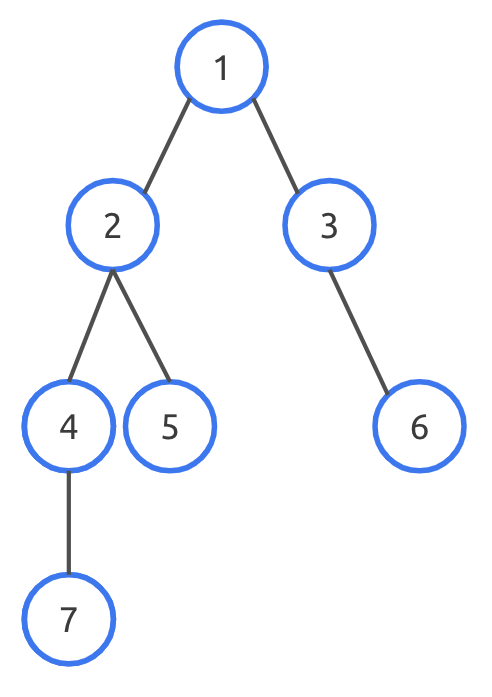

In this example, 7 and 5 are related, but their lowest common ancestor is 2. 2 and 3's lowest common ancestor is 1.

For the purposes of this problem, assume that a node can be its own ancestor / descendant, so the lowest common ancestor of 7 and 4 is 4.

In [ ]:
class FamilyNode:

  def __init__(self, name_list):
    self.name_list = name_list
    self.parent = None
    self.children = []

  def add_child(self, node):
    if node not in self.children:
      self.children.append(node)
      node.parent = self

  def get_parent(self):
    return self.parent

  def get_children(self):
    return self.children
  
  def get_names(self):
    return self.name_list

class FamilyTree:

  def __init__(self, root_node):
    self.root = root_node

  def lowest_common_ancestor(self, first_node, second_node):
    # TODO(you): implement
    print('This method has not been implemented.')

### Hint

There's no real difference in the algorithm based on which node you start with, but either way you want to trace a path from the node to the root by looping through the parents. Once you've got that path codified, you can check each node in the other node's path to root to find the lowest common ancestor.

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
tree = FamilyTree(FamilyNode(['Great-Grandma Jasmine', 'Great-Grandpa Jasper']))
node_list = [
  FamilyNode(['Great Uncle Omar']), FamilyNode(['Grandpa Jamison']), 
  FamilyNode(['Aunt Madison']), FamilyNode(['Monique Daniels', 'Alex Daniels']), 
  FamilyNode('Me')]

root = tree.root
root.add_child(node_list[0])
root.add_child(node_list[1])
node_list[1].add_child(node_list[2])
node_list[1].add_child(node_list[3])
node_list[3].add_child(node_list[4])

print(tree.lowest_common_ancestor(node_list[2], node_list[4]).get_names())
# Should print: ['Grandpa Jamison']

print(tree.lowest_common_ancestor(node_list[0], node_list[4]).get_names())
# Should print: ['Great-Grandma Jasmine', 'Great-Grandpa Jasper']

print(tree.lowest_common_ancestor(node_list[3], node_list[4]).get_names())
# Should print: ['Monique Daniels', 'Alex Daniels']

### Solution

In [ ]:
class FamilyNode:

  def __init__(self, name_list):
    self.name_list = name_list
    self.parent = None
    self.children = []

  def add_child(self, node):
    if node not in self.children:
      self.children.append(node)
      node.parent = self

  def get_parent(self):
    return self.parent

  def get_children(self):
    return self.children
  
  def get_names(self):
    return self.name_list

class FamilyTree:

  def __init__(self, root_node):
    self.root = root_node

  def lowest_common_ancestor(self, first_node, second_node):
    # First, create the first node's path to root.
    first_path = []
    current_node = first_node
    while current_node:
      first_path.append(current_node)
      current_node = current_node.parent

    # Now that we have the first node's path, we trade the second node's path.
    current_node = second_node
    while current_node:
      if current_node in first_path:
        # Eventually, we will hit the root and this will return, so we can be
        # guaranteed that this will happen before the loop terminates.
        return current_node
      current_node = current_node.parent